# Welcome to Colab!

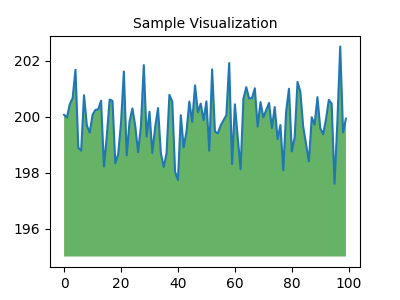

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
!pip install xlrd openpyxl

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Telco_customer_churn.xlsx")

In [ ]:
df.columns = df.columns.str.strip()
df.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(col)

CustomerID
Count
Country
State
City
Zip Code
Lat Long
Latitude
Longitude
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Label
Churn Value
Churn Score
CLTV
Churn Reason


In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


/tmp/ipython-input-2939802501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [ ]:
df.drop('CustomerID', axis=1, inplace=True)


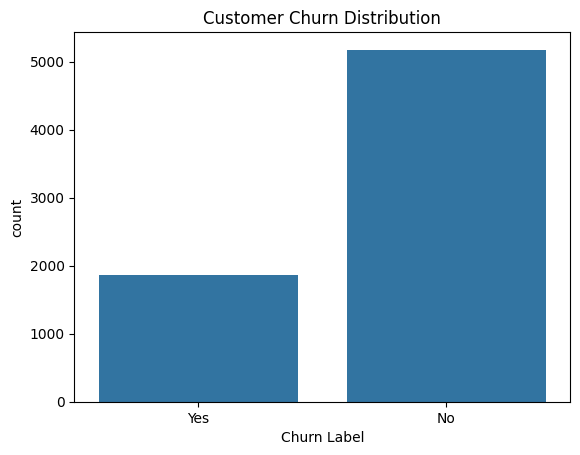

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Label', data=df)
plt.title("Customer Churn Distribution")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn Label'] = le.fit_transform(df['Churn Label'])


In [ ]:
df.drop(['Churn Value', 'Churn Score', 'Churn Reason'], axis=1, inplace=True)


In [ ]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [ ]:
df['Churn Label'].value_counts(normalize=True) * 100


,proportion
Churn Label,
0,73.463013
1,26.536987


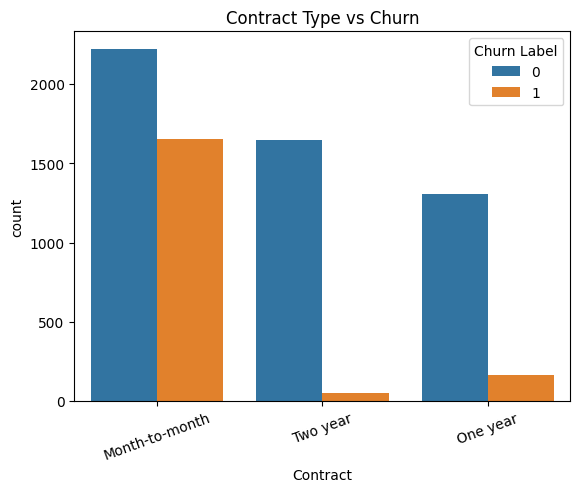

In [ ]:
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


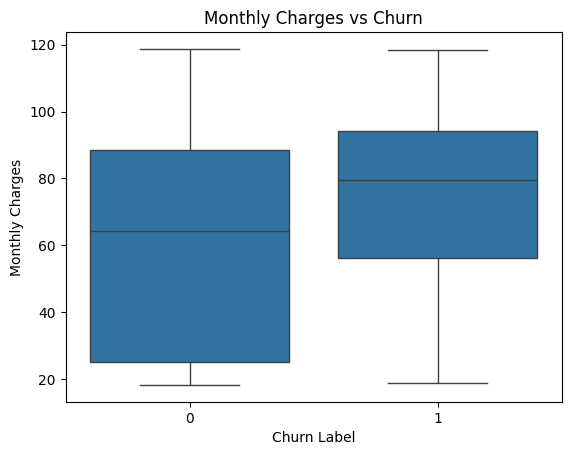

In [ ]:
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [ ]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.8019872249822569


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8041163946061036

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.71      0.53      0.60       400

    accuracy                           0.80      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.80      0.79      1409



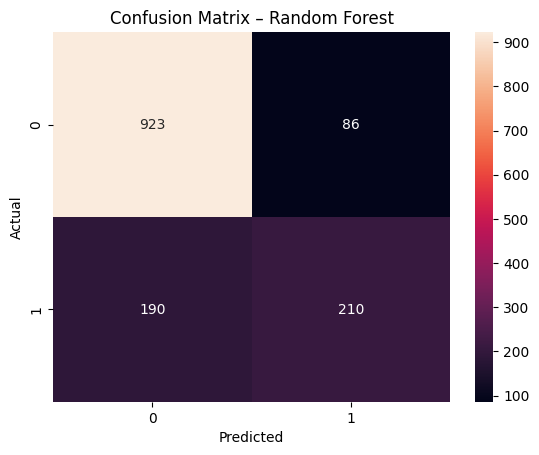

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Tenure Months,0.105006
Total Charges,0.094557
Monthly Charges,0.091946
Contract,0.067778
CLTV,0.067537
City,0.064626
Zip Code,0.063818
Longitude,0.061177
Lat Long,0.059137
Latitude,0.058415
